In [1]:
import numpy as np

n_d = 1
n_y = 1800

interval = np.arange(2, 71, 2)

amount = np.arange(2, 201, 2)

print(interval)
print(amount)

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50
 52 54 56 58 60 62 64 66 68 70]
[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106 108
 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144
 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178 180
 182 184 186 188 190 192 194 196 198 200]


In [2]:
from ppmodel import ModelParams

params = []
args = [[],[]]

for a in amount:
    for i in interval:
        args[0].append(a)
        args[1].append(i)
        params.append(ModelParams("S", 100, 100, n_d, n_y, a, i, 2))
        
print(len(params))

3500


In [3]:
import ppmodel
from multiprocessing import Pool 

data = []

try:
    
    file = open("results_e3.csv", 'r')
    
except IOError as e:
    print("Launch model")
    if __name__ == '__main__':
        p = Pool(6)
        data = p.map(ppmodel.f, params)

    f = open("results_e3.csv", 'w')
    for i in range(0, len(data)):
        f.write(str(args[0][i])+','+str(args[1][i])+','+str(data[i])+"\n")
    f.close()
else:
    print("Read file")
    args = [[],[]]
    for line in file:
        parts = line.split(',')
        args[0].append(int(parts[0]))
        args[1].append(int(parts[1]))
        data.append(int(parts[2]))
        
    file.close()

Read file


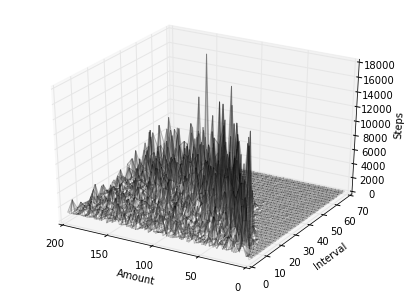

In [4]:
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
        

fig = plt.figure()
fig.set_size_inches(7, 5)
ax = fig.gca(projection='3d')
ax.plot_trisurf(args[0], args[1], data, alpha=0.15, cmap=cm.Greys)
#ax.plot_trisurf([0,0,100,100,175,175],[0,0,40,40,70,70],[0,8000,0,8000,0,8000])
ax.set_xlabel('Amount')
ax.set_ylabel('Interval')
ax.set_zlabel('Steps')
ax.invert_xaxis()
#ax.
#a = ax.xaxis
#a.set_ticks([1,100,200,300,400,500])
#ax.tick_params(axis='x', labelsize=12)
plt.show()

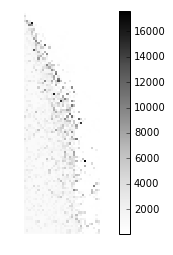

In [5]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

# axes[0].imshow(im_data1)
# axes[1].imshow(im_data)
# axes[0].axis('off')
# axes[1].axis('off')
matrix = []
for a in range(0, len(amount)):
    lst = []
    for i in range(0, len(interval)):
        lst.append(data[len(interval)*a + i])
    matrix.append(lst)
  
#print(matrix)


fig = plt.figure()
#fig.set_size_inches(15, 11)
plt.imshow(matrix, interpolation='none')
plt.set_cmap(cm.Greys)
plt.colorbar();
plt.axis('off')
plt.show()